In [1]:
# Import liberary  
from __future__ import print_function
import time
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler


import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
BAKI = pd.read_csv('BeforeAKIstaging.csv')#,

BAKI.head() #Return the first 5 rows of the data.


,itemid,id,gender,ethnicity,age,scr,baseline,irrt,aki_stage
0,51081,1709,0,1,51.71,6.1,1.210598,0,3
1,51081,1709,0,1,51.71,6.7,1.210598,0,3
2,51081,1709,0,1,51.71,7.0,1.210598,0,3
3,51081,1709,0,1,52.49,6.1,1.214283,0,3
4,51081,1709,0,1,52.49,6.7,1.214283,0,3


In [3]:
BAKI.info() #print a summary of a Data(index dtype, column dtypes, non-null values and memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   itemid     215 non-null    int64  
 1   id         215 non-null    int64  
 2   gender     215 non-null    int64  
 3   ethnicity  215 non-null    int64  
 4   age        215 non-null    float64
 5   scr        215 non-null    float64
 6   baseline   215 non-null    float64
 7   irrt       215 non-null    int64  
 8   aki_stage  215 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 15.2 KB


In [4]:
AKI  = pd.read_csv('AKIstaging.csv') #read data
AKI.head()

,id,aki_stage
0,1709,3
1,1709,3
2,1709,3
3,1709,3
4,1709,3


In [5]:
AKI.info() #print a summary of a Data(index dtype, column dtypes, non-null values and memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         215 non-null    int64
 1   aki_stage  215 non-null    int64
dtypes: int64(2)
memory usage: 3.5 KB


In [6]:
print('Size of the dataframe: {}'.format(BAKI.shape))
print('Size of the dataframe: {}'.format(AKI.shape))

Size of the dataframe: (215, 9)
Size of the dataframe: (215, 2)


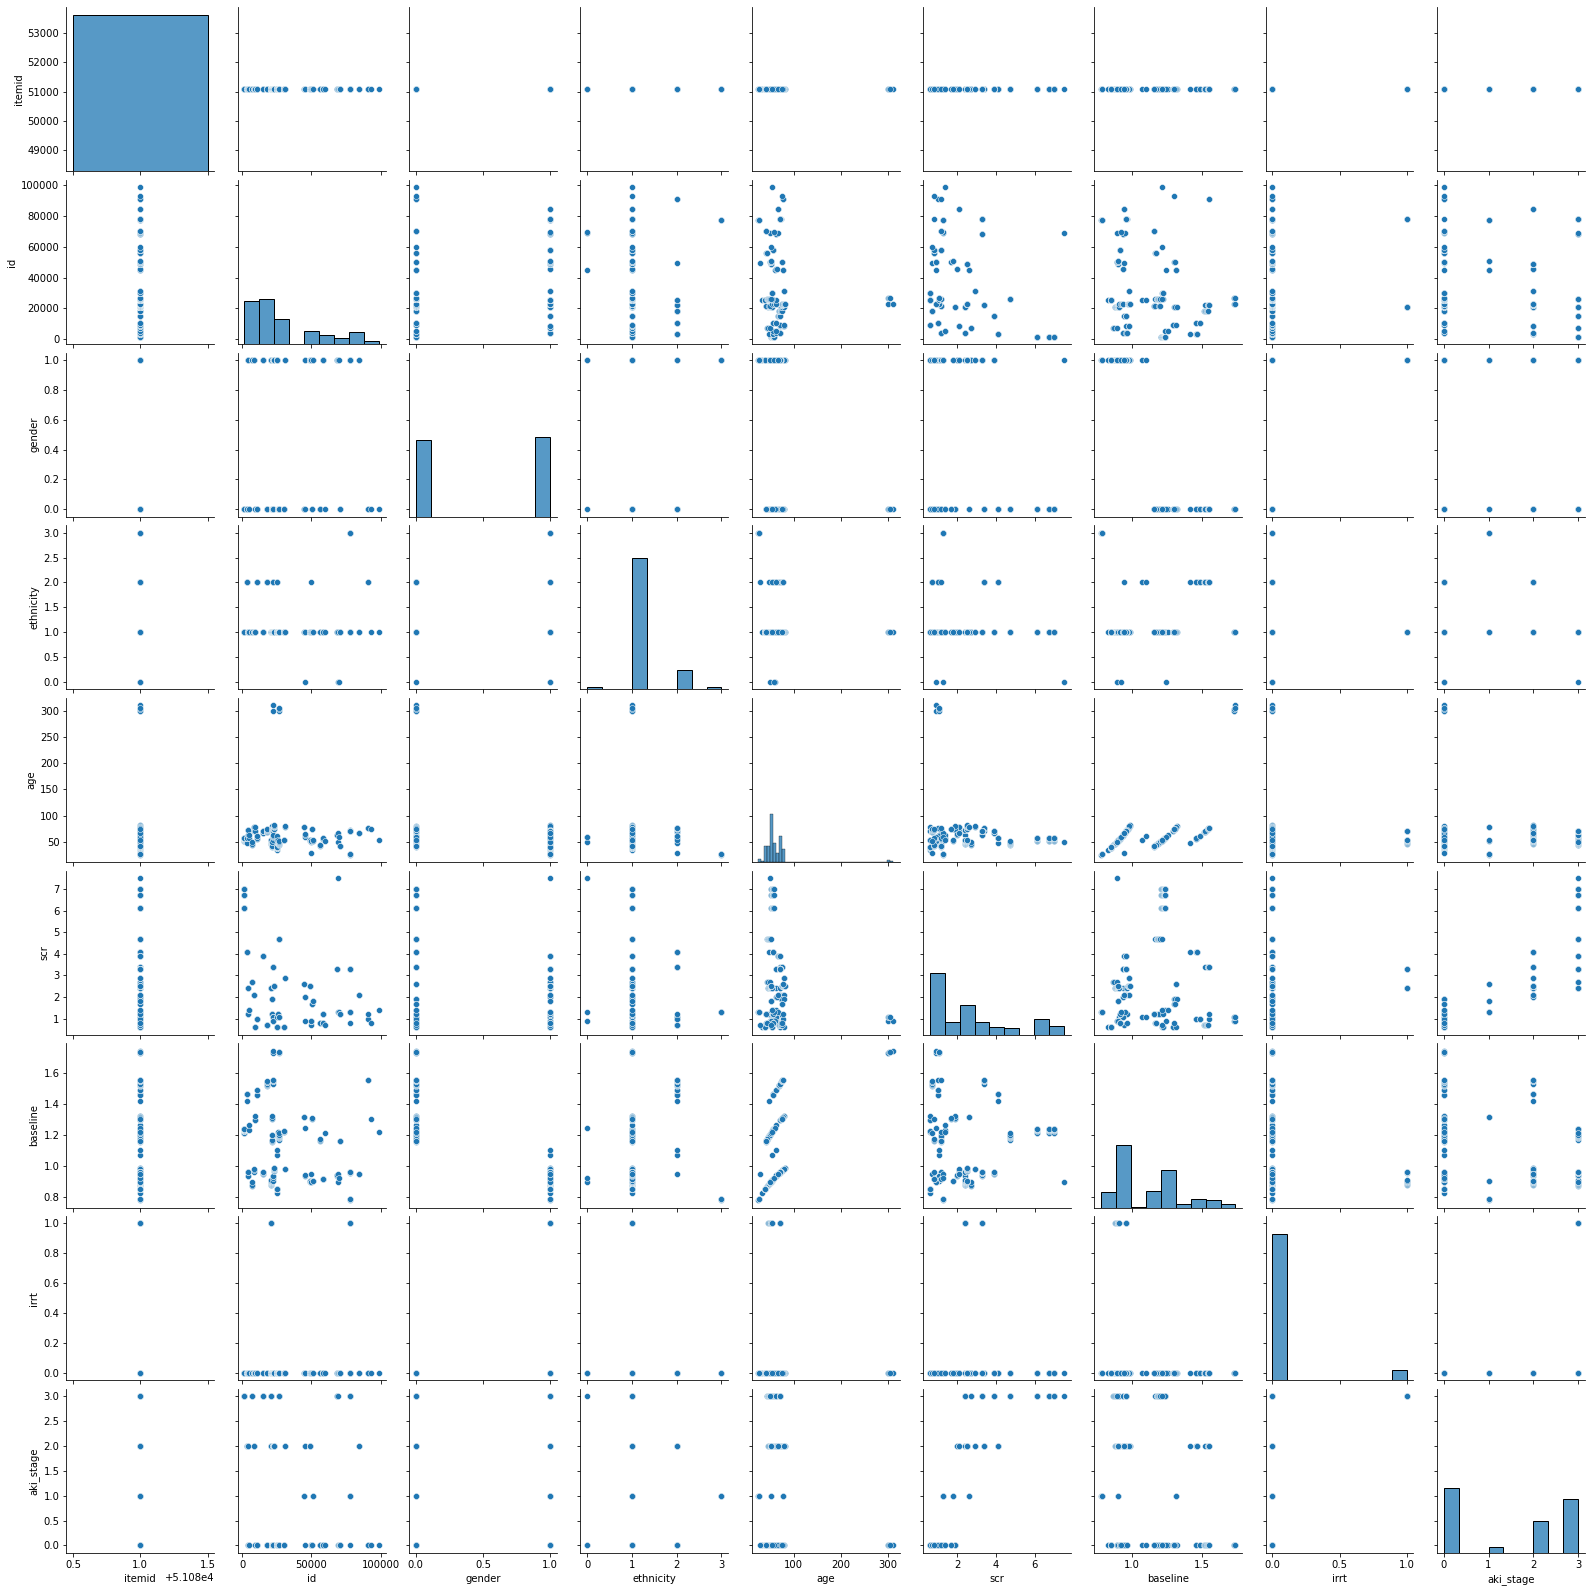

In [32]:
#Clustering BEFORE PATIENT STAGING: 
# 3 cluster using K-means
X = BAKI.drop(['id', 'baseline'], axis=1)
sns.pairplot(BAKI) # Print data in pairplot

In [11]:
print('Size of the dataframe: {}'.format(X.shape))
X.info()

Size of the dataframe: (215, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   itemid     215 non-null    int64  
 1   gender     215 non-null    int64  
 2   ethnicity  215 non-null    int64  
 3   age        215 non-null    float64
 4   baseline   215 non-null    float64
 5   irrt       215 non-null    int64  
 6   aki_stage  215 non-null    int64  
 7   Labels     215 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 12.7 KB


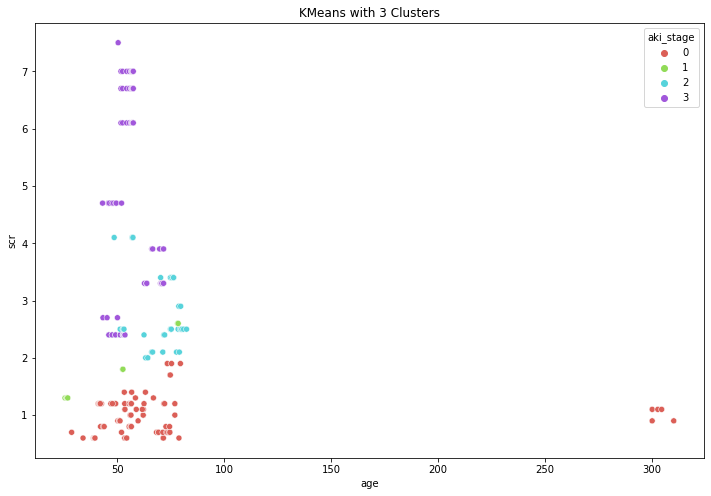

In [35]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['age'], X['scr'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

<AxesSubplot:>

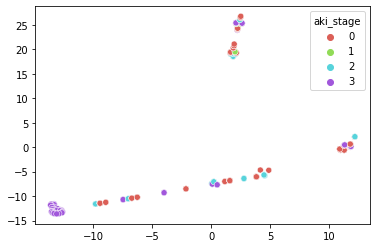

In [38]:
#tsne=TSNE()
tnse= TSNE()
AKI_embaded=tnse.fit_transform(BAKI)
sns.scatterplot(AKI_embaded[:,0], AKI_embaded[:,1],hue= X['aki_stage'],palette=sns.color_palette('hls', 4))